Tracking element #1 (s = 0 m, SourceBasic, stage 0)
Tracking element #2 (s = 0 m, BeamDeliverySystemBasic, stage 0)
Tracking element #3 (s = 1.17 m, StageBasic, stage 1)
Tracking element #4 (s = 3.07 m, DriftBasic, stage 1)
Tracking element #5 (s = 4.07 m, QuadrupoleBasic, stage 1)
Tracking element #6 (s = 5.29 m, DriftBasic, stage 1)
Tracking element #7 (s = 6.29 m, QuadrupoleBasic, stage 1)
Tracking element #8 (s = 7.52 m, DriftBasic, stage 1)
Tracking element #9 (s = 8.52 m, QuadrupoleBasic, stage 1)
Tracking element #10 (s = 12.04 m, DriftBasic, stage 1)
Tracking element #11 (s = 13.01 m, DipoleSpectrometerBasic, stage 1)
Tracking element #12 (s = 21.85 m, DriftBasic, stage 1)


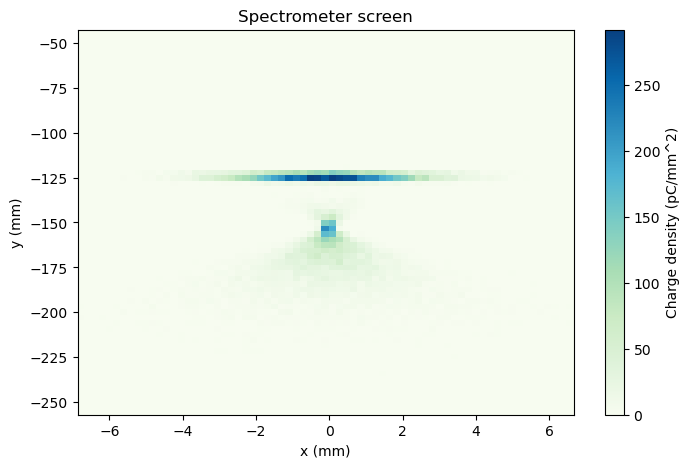

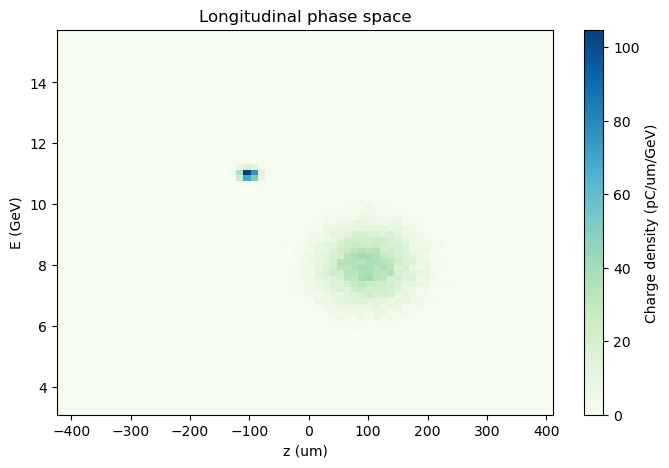

In [49]:
import sys
sys.path.append('../')
from opal import SourceBasic, SourceCombiner, StageBasic, BeamDeliverySystemBasic, SpectrometerFACET2Basic, Experiment, QuadrupoleBasic

# define witness bunch
witness = SourceBasic()
witness.L = 0 # [m]
witness.Q = -1e-9 # [C]
witness.E0 = 11e9 # [eV]
witness.sigE = 0.01*witness.E0 # [eV]
witness.sigz = 10e-6 # [m]
witness.z = -100e-6 # [m]
witness.emitnx = 5e-6 # [m rad]
witness.emitny = 2e-6 # [m rad]
witness.betax = 20e-3 # [m]
witness.betay = witness.betax
witness.Npart = 10000

# define drive bunch
driver = SourceBasic()
driver.L = 0 # [m]
driver.Q = -10e-9 # [C]
driver.E0 = 8e9 # [eV]
driver.sigE = 0.1*driver.E0 # [eV]
driver.sigz = 50e-6 # [m]
driver.z = 100e-6 # [m]
driver.emitnx = 10e-6 # [m rad]
driver.emitny = 2e-6 # [m rad]
driver.betax = 100e-3 # [m]
driver.betay = driver.betax
driver.Npart = 10000

# combine bunches
source = SourceCombiner(witness, driver)

# define beamline
bds = BeamDeliverySystemBasic()
bds.beta_waist_x = witness.betax # [m]
bds.beta_waist_y = witness.betay # [m]

# define stage
stage = StageBasic()
stage.deltaE = 0 # 4e9 # [eV]
stage.L = 1.17 # [m]
#stage.n0 = 1e22 # [m^-3]
#stage.kRb = 2.5

# define spectrometer
spectrometer = SpectrometerFACET2Basic()
spectrometer.B_dip = 0.5 # [T]
spectrometer.s_obj = 0.00 # [m]
spectrometer.mag_x = -4 # 
spectrometer.E_img = 9e9 # + stage.deltaE
spectrometer.setImaging()

# define experiment
experiment = Experiment(source, bds, stage, spectrometer)
beam = experiment.run("FACET-II")

# see output
experiment.plotSpectrometerScreen()
beam0 = source.track()
beam.plotLPS()

In [7]:
beam.beamSizeX()

0.0008469766773593178